# importing the libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# loading the dataset

In [2]:
bank=pd.read_csv(r"C:\Users\Roshika\Downloads\bank-direct-marketing-campaigns.csv\bank-direct-marketing-campaigns.csv",header=0)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA of Bank_Marketing

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [4]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
bank.shape

(41188, 20)

In [6]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
bank=bank.drop(['contact','month','day_of_week','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','default'],axis=1)
bank.head()

,age,job,marital,education,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,no,no,no
2,37,services,married,high.school,yes,no,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,yes,no


In [8]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
bank['job']=LE.fit_transform(bank['job'])
bank['marital']=LE.fit_transform(bank['marital'])
bank['housing']=LE.fit_transform(bank['housing'])
bank['loan']=LE.fit_transform(bank['loan'])
bank['education']=LE.fit_transform(bank['education'])
bank['y']=LE.fit_transform(bank['y'])

In [9]:
bank.head()

,age,job,marital,education,housing,loan,y
0,56,3,1,0,0,0,0
1,57,7,1,3,0,0,0
2,37,7,1,3,2,0,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,2,0


In [10]:
bank.job.values

array([3, 7, 7, ..., 5, 9, 5])

In [11]:
x = bank.iloc[:,:-1].values

In [12]:
y = bank.iloc[:,-1].values


# data visualization

<Axes: xlabel='education', ylabel='count'>

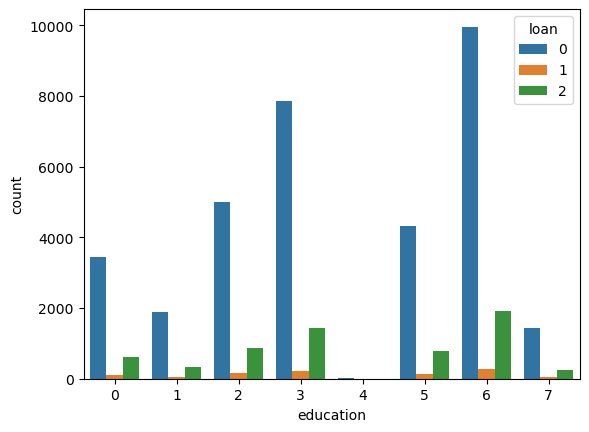

In [13]:
sns.countplot(x='education',hue='loan',data=bank)

<Axes: xlabel='marital', ylabel='count'>

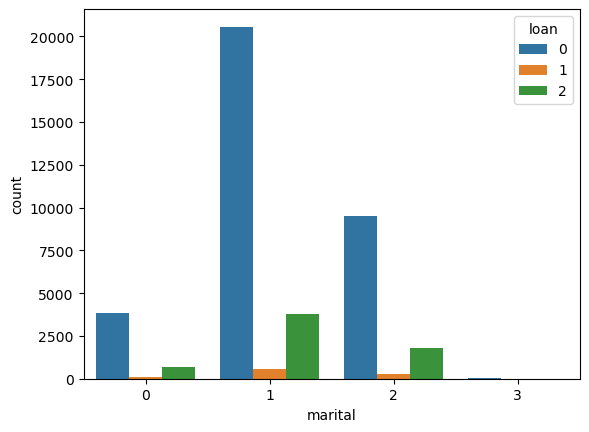

In [14]:
sns.countplot(x='marital',hue='loan',data=bank)

<Axes: >

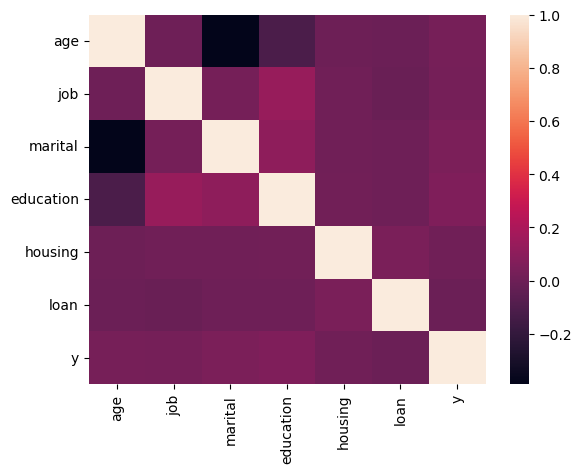

In [15]:
sns.heatmap(data=bank.corr())

In [16]:
indepvar=[]
for col in bank.columns:
    if col!='y':
        indepvar.append(col)
targetvar='y'
x=bank[indepvar]
y=bank[targetvar]

# training the dataset

In [17]:
# to build 'Random Forest' model with ramdom sampling
from sklearn.ensemble import RandomForestClassifier

In [18]:
#create an object for model

ModelRF=RandomForestClassifier()

In [19]:
#confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=143)

# Display the shape of the train_data and test_data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((28831, 6), (12357, 6), (28831,), (12357,))

In [21]:
print(x.shape,x_train.shape,x_test.shape)

(41188, 6) (28831, 6) (12357, 6)


In [22]:
ModelRF.fit(x_train,y_train)
y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

In [23]:
actual = y_test

In [24]:
predicted = y_pred

In [25]:
matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

Confusion matrix : 
 [[  112  1306]
 [  319 10620]]


In [26]:
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 112 1306 319 10620


In [27]:
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

Classification report : 
               precision    recall  f1-score   support

           1       0.26      0.08      0.12      1418
           0       0.89      0.97      0.93     10939

    accuracy                           0.87     12357
   macro avg       0.58      0.52      0.53     12357
weighted avg       0.82      0.87      0.84     12357



In [28]:
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

In [29]:
from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

Accuracy : 86.8 %
Precision : 26.0 %
Recall : 7.9 %
F1 Score : 0.121
Specificity or True Negative Rate : 97.1 %
Balanced Accuracy : 52.5 %
MCC : 0.087


# SVM model

In [30]:
from sklearn import svm
classifier=svm.SVC(kernel='linear')

In [31]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [32]:
from sklearn.metrics import accuracy_score
x_pred=classifier.predict(x_train)
accuracy=accuracy_score(x_pred,y_train)

In [33]:
print(accuracy)

0.8882452915264819


In [34]:
x_pred=classifier.predict(x_test)
accuracy_test=accuracy_score(x_pred,y_test)

In [35]:
print(accuracy_test)

0.8852472282916566


In [ ]:
model_g = SVC(gamma=10)
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)

In [ ]:
model_k = SVC(kernel='rbf')
model_k.fit(x_train,y_train)
model_k.score(x_test,y_test)

In [ ]:
model_kl = SVC(kernel='linear')
model_kl.fit(x_train,y_train)
model_kl.score(x_test,y_test)

# data visualization

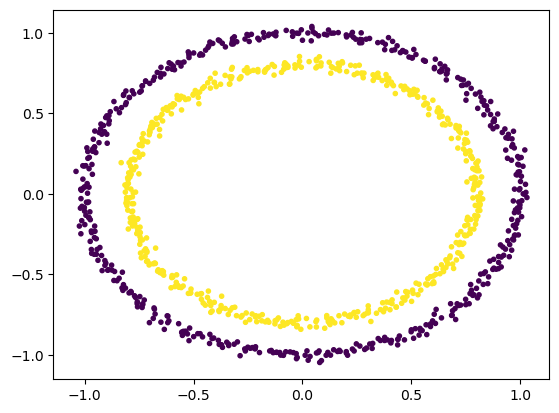

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from mpl_toolkits.mplot3d import Axes3D 

# generating data 
x, y = make_circles(n_samples=1000, noise = 0.02) 

# visualizing data 
plt.scatter(x[:, 0], x[:, 1], c = y, marker = '.') 
plt.show()

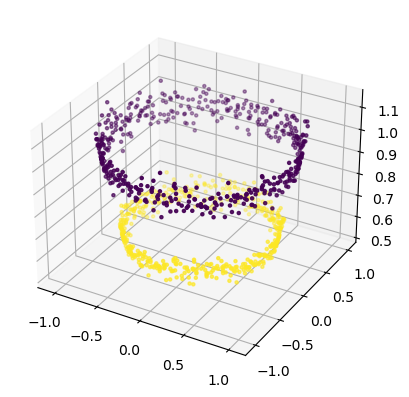

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
x, y = make_circles(n_samples=1000, noise=0.02)
x = np.column_stack((x, np.sum(np.square(x), axis=1)))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, marker='.')
plt.show()